<a href="https://colab.research.google.com/github/Wikanes-k/multivariate/blob/main/Chapter_5_Factor_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://www.datacamp.com/community/tutorials/introduction-factor-analysis

In [1]:
import pandas as pd

In [2]:
BFI_data = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/psych/bfi.csv')
BFI_data.head()

,Unnamed: 0,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5,gender,education,age
0,61617,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0,1,NaN,16
1,61618,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0,2,NaN,18
2,61620,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0,2,NaN,17
3,61621,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0,2,NaN,17
4,61622,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0,1,NaN,17


####Factor Analysis

####Assumsion :

ในข้อมูล multivariate ที่มีตัวแปร odserve variables จำนวน n ตัว มีตัวแปร Factor (Latent Variables) จำนวน k ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้

โดย k< n

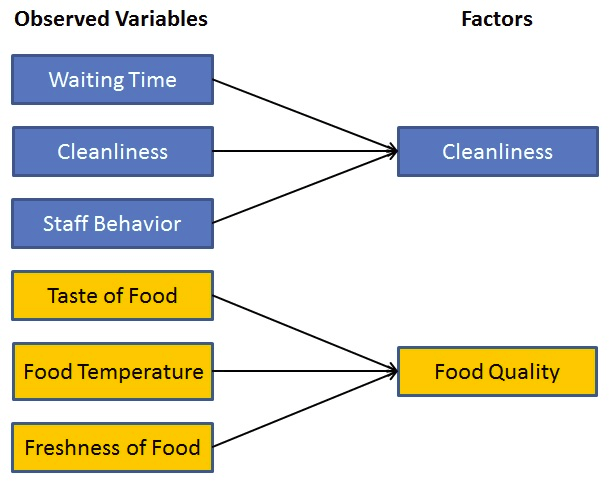

Assumption: ในการทำ Factor Analysis

*   There are no outliers in data.
*   Sample size should be greater than the factor.
*   There should not be ***perfect multicollinearity***.
*   There should not be ***homoscedasticity*** between the variables.

การทำ Factor Analysis มีประโยชน์หลัก 2 อันคือ
1. Confirmatory
2. Exploratory

###การทำ Factor Analysis

In [6]:
from factor_analyzer import FactorAnalyzer 
import matplotlib.pyplot as plt

วิธีแก้ error ModuleNotFoundError: No module named 'factor_analyzer' โดย https://stackoverflow.com/questions/61830329/modulenotfounderror-no-module-named-factor-analyzer-python-notebook

###วิธี install package อื่นๆ

In [7]:
!pip install factor_analyzer

In [8]:
from factor_analyzer import FactorAnalyzer
import matplotlib.pyplot as plt  # = from matplotlib import pyplot as plt

###Quiz 5 เลือกข้อมูลมาเฉพาะ a1,a2,a3,...,o3,o4,o5 ด้วยคำสั่ง .iloc[]

In [28]:
BFI_data_dropped = BFI_data.iloc[:,1:-3]
BFI_data_dropped

,A1,A2,A3,A4,A5,C1,C2,C3,C4,C5,E1,E2,E3,E4,E5,N1,N2,N3,N4,N5,O1,O2,O3,O4,O5
0,2.0,4.0,3.0,4.0,4.0,2.0,3.0,3.0,4.0,4.0,3.0,3.0,3.0,4.0,4.0,3.0,4.0,2.0,2.0,3.0,3.0,6,3.0,4.0,3.0
1,2.0,4.0,5.0,2.0,5.0,5.0,4.0,4.0,3.0,4.0,1.0,1.0,6.0,4.0,3.0,3.0,3.0,3.0,5.0,5.0,4.0,2,4.0,3.0,3.0
2,5.0,4.0,5.0,4.0,4.0,4.0,5.0,4.0,2.0,5.0,2.0,4.0,4.0,4.0,5.0,4.0,5.0,4.0,2.0,3.0,4.0,2,5.0,5.0,2.0
3,4.0,4.0,6.0,5.0,5.0,4.0,4.0,3.0,5.0,5.0,5.0,3.0,4.0,4.0,4.0,2.0,5.0,2.0,4.0,1.0,3.0,3,4.0,3.0,5.0
4,2.0,3.0,3.0,4.0,5.0,4.0,4.0,5.0,3.0,2.0,2.0,2.0,5.0,4.0,5.0,2.0,3.0,4.0,4.0,3.0,3.0,3,4.0,3.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2795,6.0,1.0,3.0,3.0,3.0,6.0,6.0,6.0,1.0,1.0,1.0,4.0,5.0,5.0,6.0,1.0,1.0,1.0,NaN,1.0,6.0,1,6.0,6.0,1.0
2796,2.0,4.0,4.0,3.0,5.0,2.0,3.0,4.0,4.0,3.0,2.0,2.0,4.0,4.0,3.0,NaN,3.0,2.0,3.0,3.0,6.0,3,5.0,4.0,2.0
2797,2.0,3.0,5.0,2.0,5.0,5.0,5.0,5.0,1.0,1.0,2.0,2.0,6.0,3.0,6.0,3.0,4.0,3.0,3.0,1.0,5.0,1,6.0,4.0,3.0
2798,5.0,2.0,2.0,4.0,4.0,5.0,5.0,5.0,2.0,6.0,2.0,2.0,4.0,5.0,4.0,5.0,5.0,6.0,4.0,1.0,5.0,2,5.0,5.0,1.0


In [29]:
BFI_data_dropped = BFI_data_dropped.dropna()

In [30]:
BFI_data_dropped.shape

(2436, 25)

###Bartlett's test

In [31]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#importฟังชั่นที่ต้องการ
chi_square_value,p_value = calculate_bartlett_sphericity(BFI_data_dropped)
#
chi_square_value, p_value

(18170.966350869243, 0.0)

###Kaiser-Meyer-Olkin (KMO) Test

ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

In [32]:
from factor_analyzer.factor_analyzer import calculate_kmo

kmo_all,kmo_model=calculate_kmo(BFI_data_dropped)

kmo_model

0.8485397221949221

##Factor Analysis

###Import

In [33]:
from factor_analyzer import FactorAnalyzer

###Define

In [34]:
fa = FactorAnalyzer(n_factors=20)

##Fit-transform

In [35]:
data_fa = fa.fit_transform(BFI_data_dropped)

In [36]:
data_fa.shape

(2436, 20)

##วิธีตัดสินว่าเราจะลดเหลือกี่ dimension (มี factors ทั้งหมดกี่ตัว)

In [37]:
ev,v = fa.get_eigenvalues()

###ใช้ eigen values

In [38]:
ev

array([5.13431118, 2.75188667, 2.14270195, 1.85232761, 1.54816285,
       1.07358247, 0.83953893, 0.79920618, 0.71898919, 0.68808879,
       0.67637336, 0.65179984, 0.62325295, 0.59656284, 0.56309083,
       0.54330533, 0.51451752, 0.49450315, 0.48263952, 0.448921  ,
       0.42336611, 0.40067145, 0.38780448, 0.38185679, 0.26253902])

###scree plot

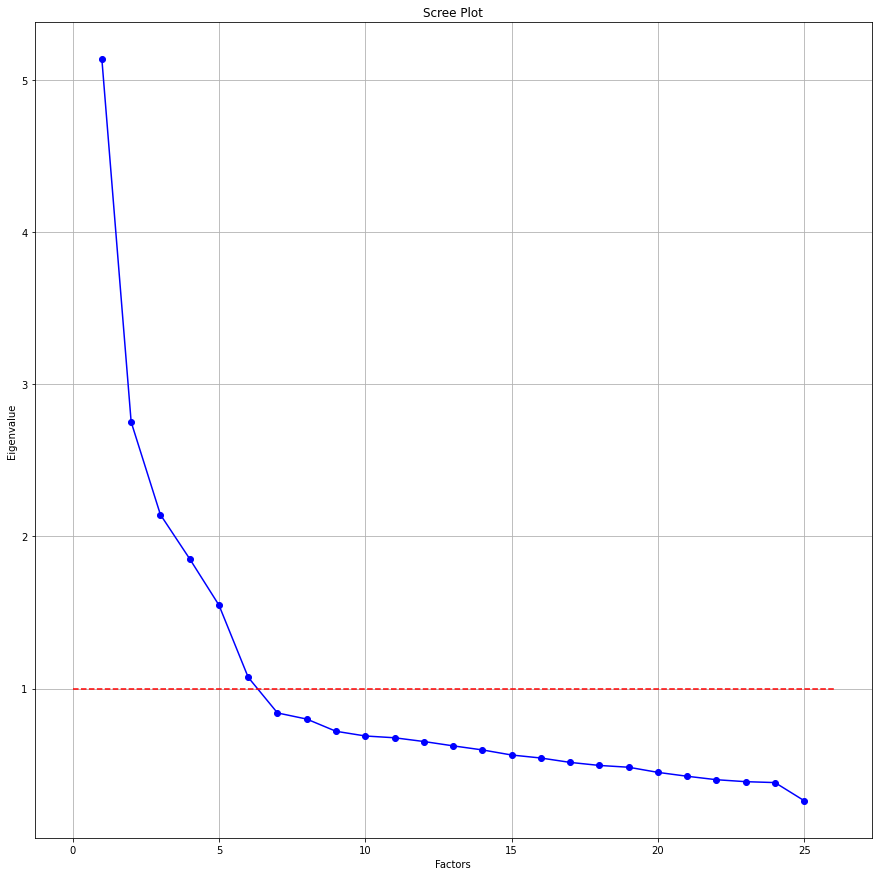

In [39]:
# Create scree plot using matplotlib
plt.plot(range(1,BFI_data_dropped.shape[1]+1),ev,'bo-')
plt.plot([0,BFI_data_dropped.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

In [40]:
data_fa[:,:6]

array([[-0.89749661, -0.12809666, -1.22649076,  1.08665889,  0.42476701,
         0.03981611],
       [ 0.33679356, -0.15018138, -0.04332274, -0.10339328,  0.29665648,
        -1.11019718],
       [-0.24521029,  0.80409961,  0.39343377, -0.30106518,  0.82703928,
        -0.2982022 ],
       ...,
       [ 0.38724631, -0.02183587,  1.19616826, -1.19357208,  0.79669501,
        -0.95295109],
       [-0.75695976,  0.94984758,  1.24363484, -1.15230215,  2.2534133 ,
        -1.0218667 ],
       [-2.35583952, -1.49829856,  0.49436981, -1.64734311,  0.94742323,
         0.43462495]])

## Factor Analyzer อีกรอบด้วย paramerets จำนวน factor เท่ากับ6

In [41]:
from factor_analyzer import FactorAnalyzer
fa2 = FactorAnalyzer(n_factors=6)
data_fa = fa2.fit_transform(BFI_data_dropped)

In [42]:
fa2.loadings_.shape

(25, 6)

###Plot factor loadings

In [43]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

###matrix plot
confirmatory

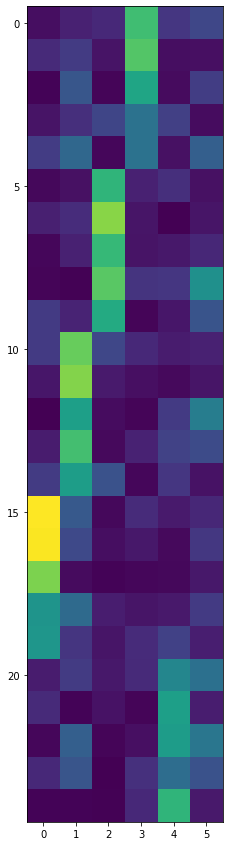

In [44]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fa2.loadings_))

###กราฟแท่ง
Exploratory

In [45]:
BFI_data_dropped.columns

Index(['A1', 'A2', 'A3', 'A4', 'A5', 'C1', 'C2', 'C3', 'C4', 'C5', 'E1', 'E2',
       'E3', 'E4', 'E5', 'N1', 'N2', 'N3', 'N4', 'N5', 'O1', 'O2', 'O3', 'O4',
       'O5'],
      dtype='object')

<BarContainer object of 25 artists>

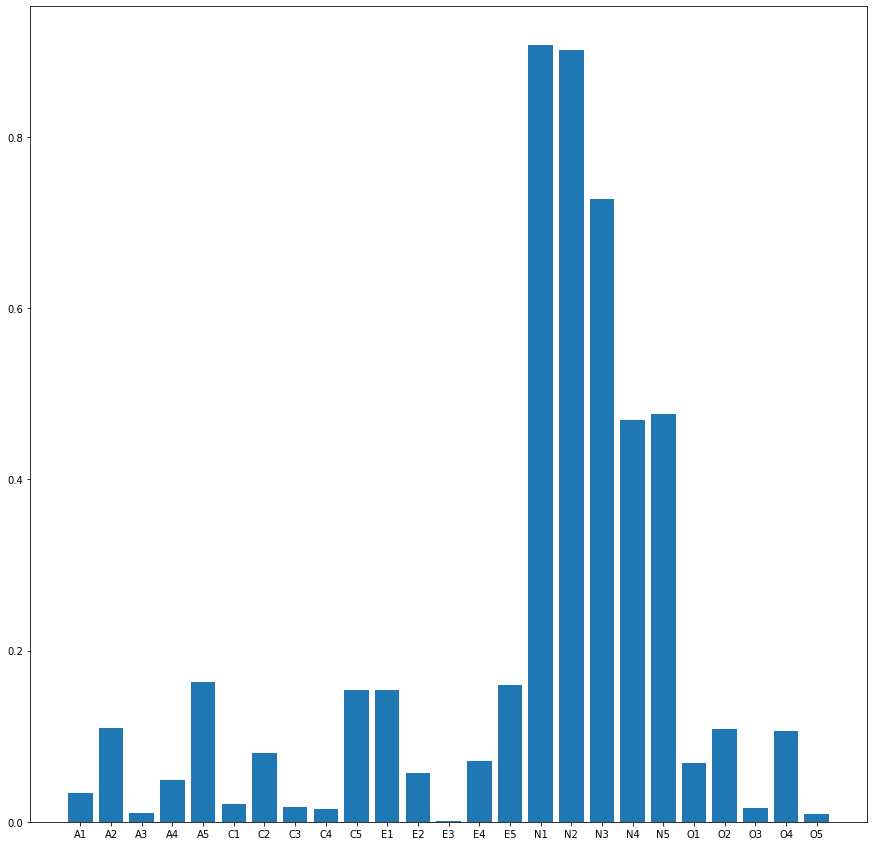

In [46]:
plt.bar(range(25),np.absolute(fa2.loadings_[:,0]),tick_label=BFI_data_dropped.columns)

#Exam03

ทำ Factor Analysis ข้อมูล Fifa 2018 https://drive.google.com/file/d/1UORRKWMb8GCN455eJE_n9MvBHupnSVwv/view?usp=sharing


##1.ทำการ Import ข้อมูล

In [47]:
fifa = pd.read_csv('FIFA 2018 Statistics.csv')
fifa

,Date,Team,Opponent,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red,Man of the Match,1st Goal,Round,PSO,Goals in PSO,Own goals,Own goal Time
0,14-06-2018,Russia,Saudi Arabia,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0,Yes,12.0,Group Stage,No,0,NaN,NaN
1,14-06-2018,Saudi Arabia,Russia,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0,No,NaN,Group Stage,No,0,NaN,NaN
2,15-06-2018,Egypt,Uruguay,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0,No,NaN,Group Stage,No,0,NaN,NaN
3,15-06-2018,Uruguay,Egypt,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0,Yes,89.0,Group Stage,No,0,NaN,NaN
4,15-06-2018,Morocco,Iran,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0,No,NaN,Group Stage,No,0,1.0,90.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,11-07-2018,England,Croatia,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0,No,5.0,Semi- Finals,No,0,NaN,NaN
124,14-07-2018,Belgium,England,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0,Yes,4.0,3rd Place,No,0,NaN,NaN
125,14-07-2018,England,Belgium,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0,No,NaN,3rd Place,No,0,NaN,NaN
126,15-07-2018,France,Croatia,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0,Yes,18.0,Final,No,0,1.0,18.0


##2.เลือกข้อมูล
###เลือกเฉพาะข้อมูลที่ต้องการ นั่นก็คือ Goal-scored ถึง Rad

In [53]:
fifa.shape

(128, 27)

In [57]:
fifa_drop = fifa.iloc[:,3:20]
fifa_drop

,Goal Scored,Ball Possession %,Attempts,On-Target,Off-Target,Blocked,Corners,Offsides,Free Kicks,Saves,Pass Accuracy %,Passes,Distance Covered (Kms),Fouls Committed,Yellow Card,Yellow & Red,Red
0,5,40,13,7,3,3,6,3,11,0,78,306,118,22,0,0,0
1,0,60,6,0,3,3,2,1,25,2,86,511,105,10,0,0,0
2,0,43,8,3,3,2,0,1,7,3,78,395,112,12,2,0,0
3,1,57,14,4,6,4,5,1,13,3,86,589,111,6,0,0,0
4,0,64,13,3,6,4,5,0,14,2,86,433,101,22,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123,1,46,11,1,6,4,4,3,24,5,79,479,148,14,1,0,0
124,2,43,12,4,3,5,4,1,5,5,88,510,108,11,1,0,0
125,0,57,15,5,7,3,5,0,12,2,92,698,110,5,2,0,0
126,4,39,8,6,1,1,2,1,14,1,75,271,99,14,2,0,0


In [59]:
fifa_drop.shape   #ขนาดของข้อมูลหลังเลือกข้อมูลที่ต้องการ

(128, 17)

##3.การใช้ Bartlett's test

In [61]:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
#importฟังชั่นที่ต้องการ
chi_square_value,p_value = calculate_bartlett_sphericity(fifa_drop)
chi_square_value, p_value

(1299.3697851171412, 2.713580160466225e-189)

โดยถ้าค่า p-value เข้าใกล้ 0 จะถือว่าดี 

ซึ่งผล output จะได้ค่า p-value = 2.71 x 10^-189 ซึ่งมีค่าเข้าใกล้ 0 มาก

##4.ทำการใช้ Kaiser-Meyer-Olkin (KMO) Test

In [62]:
from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(fifa_drop)
kmo_model

0.5594556344508279

ถ้าค่า KMO model มีค่ามากกว่า 0.6 แปลว่าข้อมูลเหมาะสมที่นำไปทำ Factor Analysis

ซึ่งผล output จะได้ค่า KMO จาก model มีค่า 0.5594556344508279 หรือประมาณได้ 0.6 ซึ่งแปลว่าเหมาะสมที่นำไปทำ Factor Analysis

##5.ทำการ Factor Analysis

In [69]:
from factor_analyzer import FactorAnalyzer   #IMPORT

In [73]:
fifa_fa = FactorAnalyzer(n_factors=12)   #DEFINE กำหนดขนาดที่เลือก

In [76]:
newfifa_fa = fifa_fa.fit_transform(fifa_drop)  #Fit-transform

In [77]:
newfifa_fa.shape   #ตรวจสอบขนาดข้อมูล

(128, 12)

##6.ตัดสินว่าเราจะลดเหลือกี่ dimension โดยการใช้ eigen values

In [78]:
ev,v = fifa_fa.get_eigenvalues()
ev

array([4.93533676, 1.66110682, 1.45898601, 1.31857945, 1.27991548,
       1.1607222 , 0.89822418, 0.80740568, 0.78874612, 0.65948826,
       0.56563441, 0.48116939, 0.38549929, 0.29659929, 0.22859409,
       0.06848785, 0.00550471])

##7.ทำการ scree plot

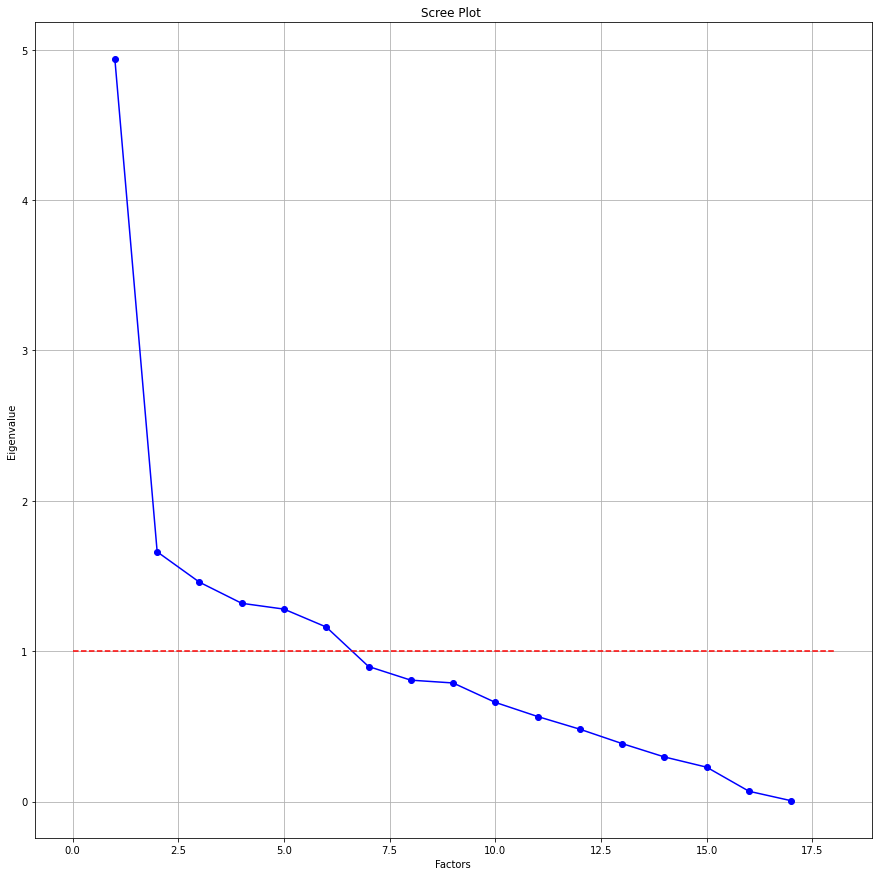

In [79]:
plt.plot(range(1,sph_drop.shape[1]+1),ev,'bo-')
plt.plot([0,sph_drop.shape[1]+1],[1,1],'r--')
plt.title('Scree Plot ')
plt.xlabel('Factors')
plt.ylabel('Eigenvalue')
plt.grid()
plt.show()

จากข้อมูลจะเห็นได้ว่าจาก 17 factor มีตัวที่มีค่า factor มากกว่า 1 อยู่ 6 ตัว

In [81]:
newfifa_fa[:,:6]

array([[-1.16530966e+00,  1.00477972e+00,  2.84508459e+00,
         1.74042026e-01,  5.71334972e-01,  2.71082184e-01],
       [ 4.71059482e-01, -2.22887380e-01, -1.12167926e+00,
        -1.54074536e-01, -6.58701397e-01, -6.58651052e-01],
       [-6.89063842e-01,  3.10107984e-01, -1.10637669e+00,
        -2.31177898e-01,  1.40976511e-01, -7.46920385e-01],
       [ 7.52548827e-01,  3.14711283e-01, -2.81702893e-01,
        -2.19815374e-01, -1.39294617e+00, -4.83701989e-02],
       [ 1.35303292e-01, -4.24567208e-01, -3.77434115e-01,
        -1.96440470e-02,  9.19446993e-01,  6.05737042e-01],
       [-1.25168343e+00, -8.37798204e-01, -1.88119413e-01,
        -3.97799005e-01,  9.92783002e-01, -1.44296168e+00],
       [-4.08251347e-01, -6.06061217e-01,  9.11180609e-01,
        -3.79570466e-01, -5.81739379e-02, -2.91803879e-01],
       [ 1.79107845e+00, -3.97534875e-01,  1.05894250e+00,
        -3.76671547e-01, -7.37169369e-01, -5.31441798e-01],
       [ 2.63803971e-01, -3.33604671e-01,  7.436

##8.Factor Analyzer อีกรอบด้วย paramerets จำนวน factor เท่ากับ6

In [83]:
from factor_analyzer import FactorAnalyzer
fifa_fa2 = FactorAnalyzer(n_factors=6)
newfifa_fa2 = fifa_fa2.fit_transform(fifa_drop)

In [85]:
fifa_fa2.loadings_.shape  #ขนาดของ ex_fa2

(17, 6)

##9.Plot factor loadings

In [86]:
from matplotlib import pyplot as plt
import numpy as np
import matplotlib

###matrix plot
confirmatory

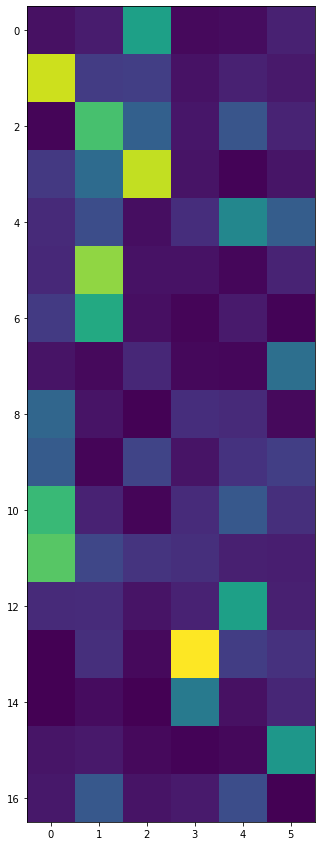

In [87]:
matplotlib.rcParams['figure.figsize']=[15,15]
plt.imshow(np.absolute(fifa_fa2.loadings_))

###กราฟแท่ง
Exploratory

In [88]:
fifa_drop.columns

Index(['Goal Scored', 'Ball Possession %', 'Attempts', 'On-Target',
       'Off-Target', 'Blocked', 'Corners', 'Offsides', 'Free Kicks', 'Saves',
       'Pass Accuracy %', 'Passes', 'Distance Covered (Kms)',
       'Fouls Committed', 'Yellow Card', 'Yellow & Red', 'Red'],
      dtype='object')

<BarContainer object of 17 artists>

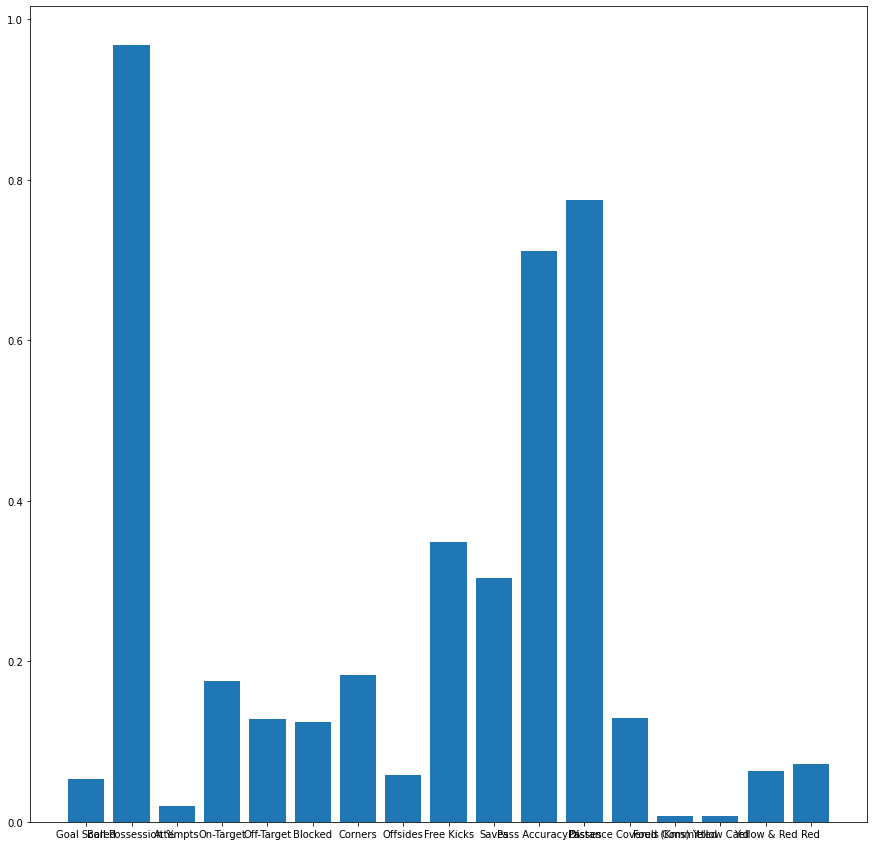

In [91]:
plt.bar(range(17),np.absolute(fifa_fa2.loadings_[:,0]),tick_label=fifa_drop.columns)

จากผลการทดลอง FIFA 2018 Statistics จะได้ว่า ข้อมูล Fifa 2018 Statistics นี้ จะมีตัวแปร Factors จำนวน 6 ตัว ที่สามารถอธิบายข้อมูลทั้งหมดได้และสามารถวิเคราะห์องค์ประกอบเชิงสำรวจ (Exporatory Factors Analysis) และ วิเคราะห์องค์ประกอบเชิงยืนยัน (Confirmatory Factors Analysis) ได้